# **Assessing and Implementing Supervised Machine Learning for Effective Customer Churn Prediction**

Khanh Tran

## 1. Research Objectives

1. Identifying the primary factors contributing to customer churn: This research aims to figure out the main factors that lead to consumers terminating the service by analyzing customer data and identifying trends. Being able to understand these characteristics facilitates the design of targeted interventions aimed at addressing the factors behind churn.
2. Studying the correlation between different characteristics and turnover status will offer valuable insights into consumer behavior and preferences. The research will provide methods to boost client retention by concentrating on individualized products and enhanced service quality.
3. Create a dependable machine learning model for predicting customer churn. The project attempts to develop a prediction model using sophisticated machine learning techniques to reliably anticipate client attrition. The project aims to provide a strong tool for proactive churn control by evaluating different algorithms and enhancing model performance.
4. Assess and benchmark the performance of various machine learning models across multiple customer churn datasets to establish a reference for future research and development efforts in the field of customer churn prediction.

## 2. Exploratory Data Analysis

In [66]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.base import BaseEstimator, TransformerMixin

import warnings
warnings.filterwarnings("ignore")

In [67]:
# Read dataset
data = pd.read_csv('../data/raw/telecom_customer_churn.csv')

# Display the first five rows to understand about dataset
data.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


In [68]:
# Create a brief summary data table
data_summary = pd.DataFrame({
    "Unique Values" : data.nunique(),
    "Missing Values": data.isnull().sum(),
    'NaN Values': data.isna().sum(),
    'Duplicated' : data.duplicated().sum(),
    'Dtypes': data.dtypes
})

data_summary.sort_values('Missing Values', ascending=False)

,Unique Values,Missing Values,NaN Values,Duplicated,Dtypes
Churn Reason,20,5174,5174,0,object
Churn Category,5,5174,5174,0,object
Offer,5,3877,3877,0,object
Internet Type,3,1526,1526,0,object
Unlimited Data,2,1526,1526,0,object
Streaming Music,2,1526,1526,0,object
Streaming Movies,2,1526,1526,0,object
Streaming TV,2,1526,1526,0,object
Premium Tech Support,2,1526,1526,0,object
Device Protection Plan,2,1526,1526,0,object


In [69]:
# Summary statistics for numerical features
data.drop(columns=['Zip Code', 'Latitude', 'Longitude']).describe()

,Age,Number of Dependents,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
count,7043.000000,7043.000000,7043.000000,7043.000000,6361.000000,5517.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,46.509726,0.468692,1.951867,32.386767,25.420517,26.189958,63.596131,2280.381264,1.962182,6.860713,749.099262,3034.379056
std,16.750352,0.962802,3.001199,24.542061,14.200374,19.586585,31.204743,2266.220462,7.902614,25.104978,846.660055,2865.204542
min,19.000000,0.000000,0.000000,1.000000,1.010000,2.000000,-10.000000,18.800000,0.000000,0.000000,0.000000,21.360000
25%,32.000000,0.000000,0.000000,9.000000,13.050000,13.000000,30.400000,400.150000,0.000000,0.000000,70.545000,605.610000
50%,46.000000,0.000000,0.000000,29.000000,25.690000,21.000000,70.050000,1394.550000,0.000000,0.000000,401.440000,2108.640000
75%,60.000000,0.000000,3.000000,55.000000,37.680000,30.000000,89.750000,3786.600000,0.000000,0.000000,1191.100000,4801.145000
max,80.000000,9.000000,11.000000,72.000000,49.990000,85.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000


In [70]:
# Summary statistics for key numerical features
data[['Age', 'Tenure in Months', 'Avg Monthly Long Distance Charges', 'Total Charges', 'Total Revenue']].describe()

,Age,Tenure in Months,Avg Monthly Long Distance Charges,Total Charges,Total Revenue
count,7043.000000,7043.000000,6361.000000,7043.000000,7043.000000
mean,46.509726,32.386767,25.420517,2280.381264,3034.379056
std,16.750352,24.542061,14.200374,2266.220462,2865.204542
min,19.000000,1.000000,1.010000,18.800000,21.360000
25%,32.000000,9.000000,13.050000,400.150000,605.610000
50%,46.000000,29.000000,25.690000,1394.550000,2108.640000
75%,60.000000,55.000000,37.680000,3786.600000,4801.145000
max,80.000000,72.000000,49.990000,8684.800000,11979.340000


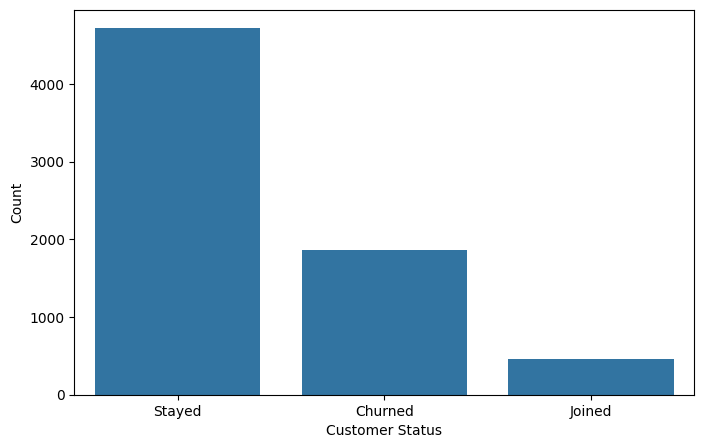

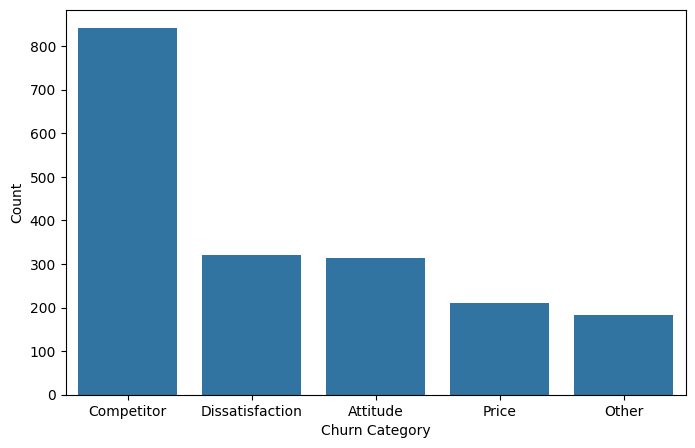

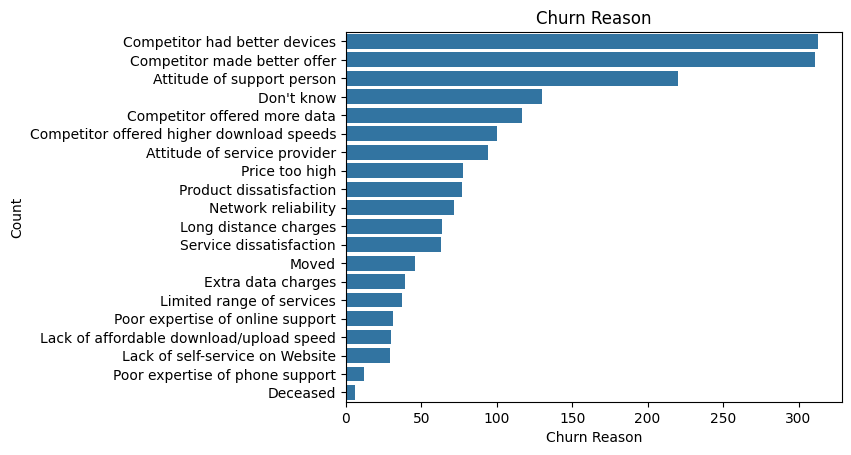

In [71]:
# # Setting the aesthetics for plots
# sns.set_theme(style="whitegrid")

# Visualizing the distribution of churn
plt.figure(figsize=(8, 5))
sns.countplot(x='Customer Status', data=data)
#plt.title('Distribution of Customer Status')
plt.xlabel('Customer Status')
plt.ylabel('Count')
plt.show()

# Analyzing churn category
plt.figure(figsize=(8, 5))
sns.countplot(x='Churn Category', data=data, order=data['Churn Category'].value_counts().index)
#plt.title('Churn Category Count')
plt.xlabel('Churn Category')
plt.ylabel('Count')
plt.show()

# Analyzing churn reason
sns.countplot(data=data, y='Churn Reason', order=data['Churn Reason'].value_counts().index)
plt.title('Churn Reason')
plt.xlabel('Churn Reason')
plt.ylabel('Count')
plt.show()

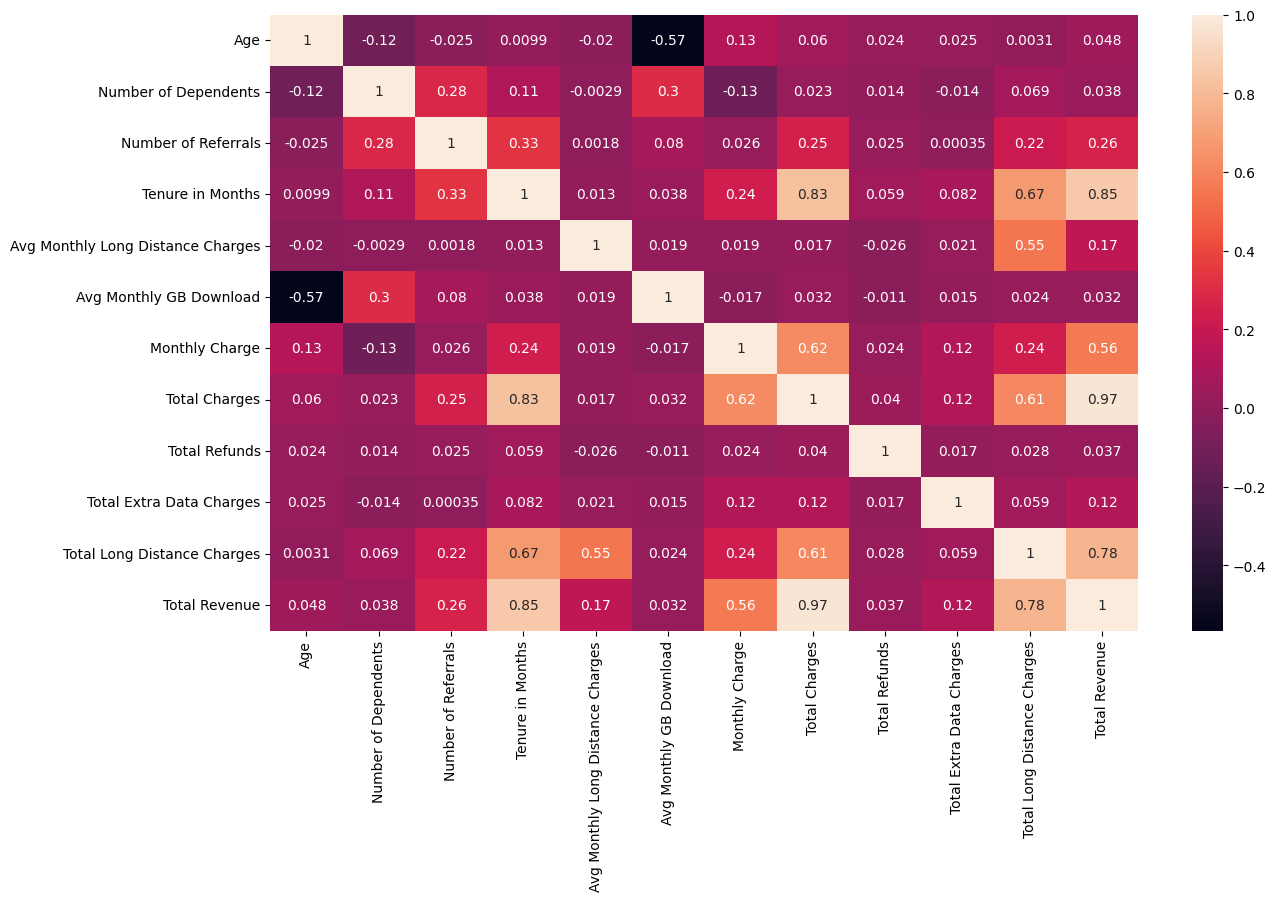

In [72]:
# Correlation among numeric variables
plt.figure(figsize=(14, 8))
sns.heatmap(data.drop(columns=['Zip Code','Latitude', 'Longitude']).select_dtypes(['int64','float64']).corr(),annot=True)
plt.show()

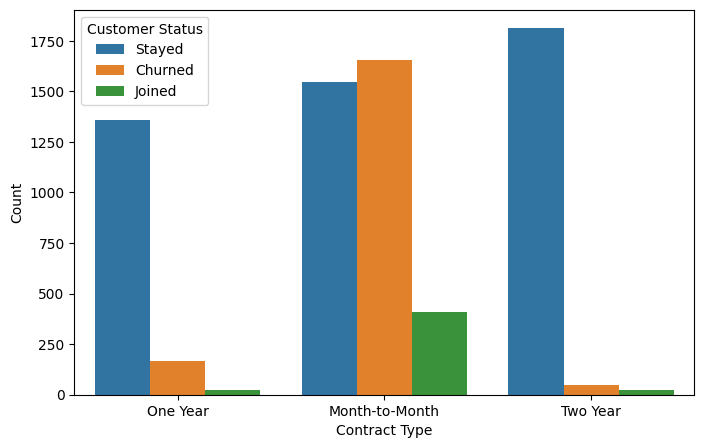

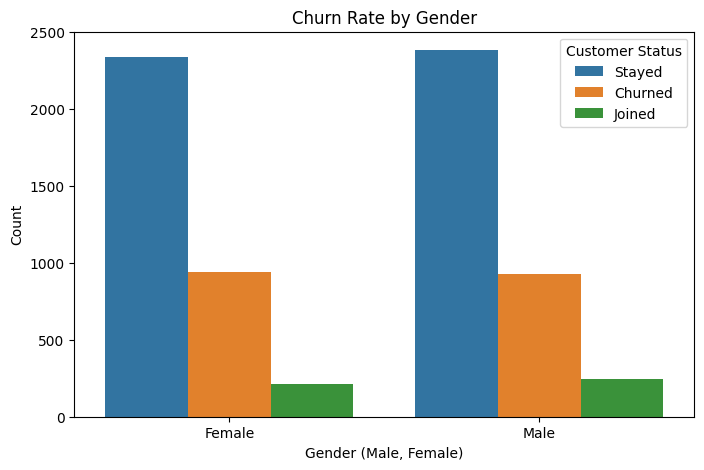

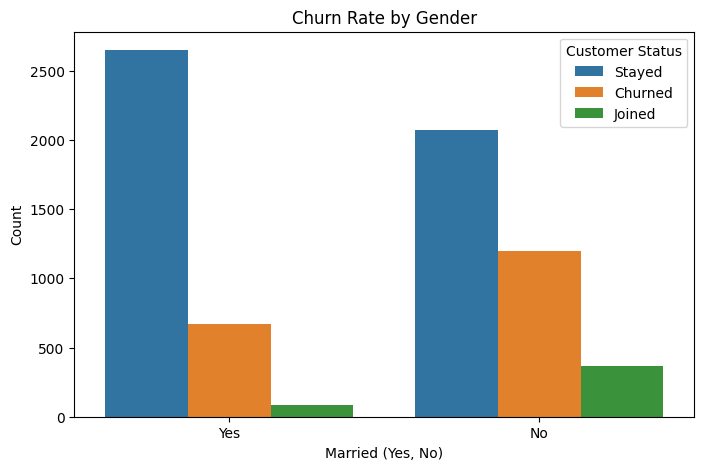

In [73]:
# Analyzing churn rate by contract type
plt.figure(figsize=(8, 5))
sns.countplot(x='Contract', hue='Customer Status', data=data)
#plt.title('Churn Rate by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.legend(title='Customer Status')
plt.show()


# Analyzing churn rate by gender
plt.figure(figsize=(8, 5))
sns.countplot(x='Gender', hue='Customer Status', data=data)
plt.title('Churn Rate by Gender')
plt.xlabel('Gender (Male, Female)')
plt.ylabel('Count')
plt.legend(title='Customer Status')
plt.show()


# Analyzing churn rate by gender
plt.figure(figsize=(8, 5))
sns.countplot(x='Married', hue='Customer Status', data=data)
plt.title('Churn Rate by Gender')
plt.xlabel('Married (Yes, No)')
plt.ylabel('Count')
plt.legend(title='Customer Status')
plt.show()

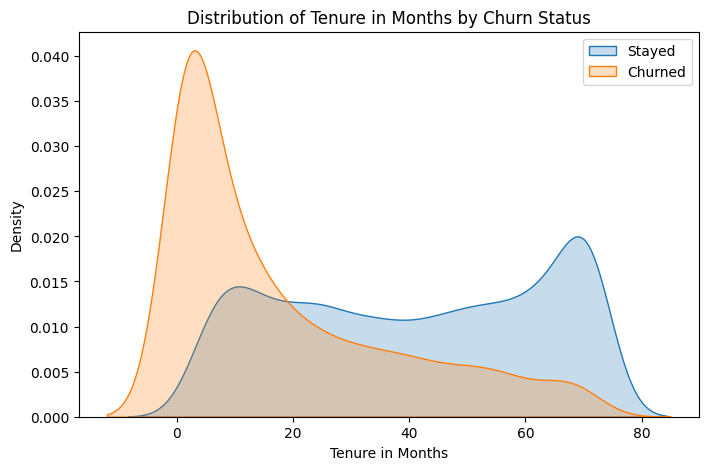

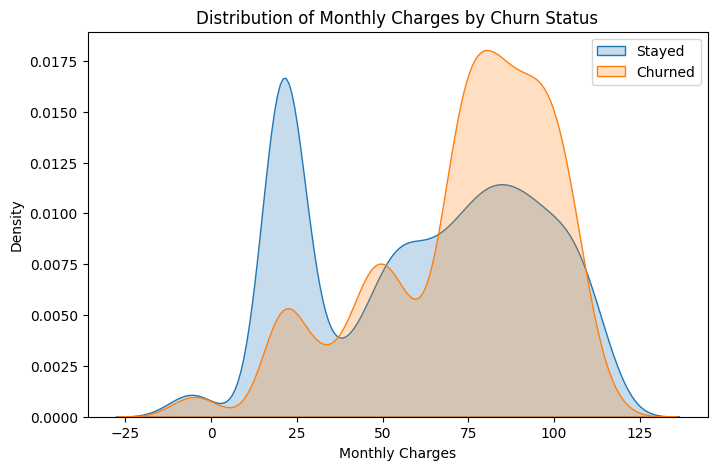

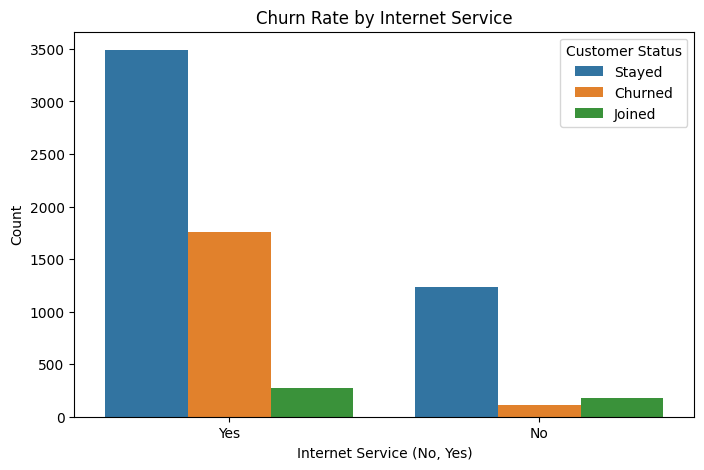

In [74]:
# Analyzing Tenure in Months vs. Churn
plt.figure(figsize=(8, 5))
sns.kdeplot(data=data[data['Customer Status'] == 'Stayed']['Tenure in Months'], label='Stayed', fill=True)
sns.kdeplot(data=data[data['Customer Status'] == 'Churned']['Tenure in Months'], label='Churned', fill=True)
plt.title('Distribution of Tenure in Months by Churn Status')
plt.xlabel('Tenure in Months')
plt.ylabel('Density')
plt.legend()
plt.show()

# Analyzing Monthly Charges vs. Churn
plt.figure(figsize=(8, 5))
sns.kdeplot(data=data[data['Customer Status'] == 'Stayed']['Monthly Charge'], label='Stayed', fill=True)
sns.kdeplot(data=data[data['Customer Status'] == 'Churned']['Monthly Charge'], label='Churned', fill=True)
plt.title('Distribution of Monthly Charges by Churn Status')
plt.xlabel('Monthly Charges')
plt.ylabel('Density')
plt.legend()
plt.show()

# Analyzing Internet Service vs. Churn
plt.figure(figsize=(8, 5))
sns.countplot(x='Internet Service', hue='Customer Status', data=data)
plt.title('Churn Rate by Internet Service')
plt.xlabel('Internet Service (No, Yes)')
plt.ylabel('Count')
plt.legend(title='Customer Status')
plt.show()

## 3. Data Preparation

#### 3.1 Data Spliting

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif


# Since we focus on Churn prediction, I remove Joined status
data = data[data['Customer Status'] != 'Joined']

# Remove non-informative and directed churn indicator columns
data = data.drop(columns=['Customer ID', 'City', 'Zip Code', 'Latitude', 'Longitude', 'Churn Category', 'Churn Reason'])

# Map Customer Status
data['Customer Status'] = data['Customer Status'].map({'Stayed': 0, 'Churned': 1})

# Using 'Customer Status' as the target variable
X = data.drop(columns=['Customer Status'])
y = data['Customer Status']

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=6910)

# Displaying the shapes of the train and test sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4941, 30), (1648, 30), (4941,), (1648,))

#### 3.2 \& 3.3. Filling Missing and Scaling Numerical Variables

In [77]:
# Identify numerical columns
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

# Creating transformers for numeric variables - fill missing and saling 
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=0)),  # Impute missing values 
    ('scaler', MinMaxScaler()) # min-max scaling
])

#### 3.2 \& 3.4 Filling Missing and Encoding Categorical Variables

In [78]:
# Identify categorical columns
categorical_cols = X_train.select_dtypes(include=['object']).columns

# Creating transformers for categorical variables - fill missing and encoding
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='NO')),  # Impute missing values
    ('onehot', OneHotEncoder(handle_unknown='ignore')) # one-hot encoding
])

In [79]:
# Combining transformers into a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Creating a processing pipeline
processing_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

In [80]:
# Fit & transform processing pipeline to the training data
X_train_processed = processing_pipeline.fit_transform(X_train, y_train)

# Transform test data
X_test_processed = processing_pipeline.transform(X_test)

# Get the feature names after processing
encoded_feature_names = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_cols)
all_feature_names = np.concatenate([numerical_cols, encoded_feature_names])

In [81]:
X_train_pro_df = pd.DataFrame(data = X_train_processed, columns=all_feature_names)
X_train_pro_df.head()

,Age,Number of Dependents,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,...,Unlimited Data_No,Unlimited Data_Yes,Contract_Month-to-Month,Contract_One Year,Contract_Two Year,Paperless Billing_No,Paperless Billing_Yes,Payment Method_Bank Withdrawal,Payment Method_Credit Card,Payment Method_Mailed Check
0,0.819672,0.0,0.545455,0.211268,0.968394,0.070588,0.738252,0.158355,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,0.491803,0.0,0.000000,0.394366,0.555111,0.023529,0.843495,0.336299,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.606557,0.0,0.000000,0.309859,0.923585,0.000000,0.236505,0.053341,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.377049,0.0,0.636364,1.000000,0.373275,0.035294,0.929709,0.935899,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
4,0.540984,0.0,0.636364,0.816901,0.809562,0.047059,0.925437,0.754551,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


In [82]:
X_test_pro_df = pd.DataFrame(data = X_test_processed, columns = all_feature_names)
X_test_pro_df.head()

,Age,Number of Dependents,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,...,Unlimited Data_No,Unlimited Data_Yes,Contract_Month-to-Month,Contract_One Year,Contract_Two Year,Paperless Billing_No,Paperless Billing_Yes,Payment Method_Bank Withdrawal,Payment Method_Credit Card,Payment Method_Mailed Check
0,0.278689,0.000000,0.090909,0.197183,0.566113,0.329412,0.732427,0.148807,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,0.459016,0.000000,0.000000,0.197183,0.662933,0.000000,0.228350,0.031208,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.721311,0.000000,0.000000,0.028169,0.931586,0.188235,0.465243,0.012838,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.524590,0.333333,0.363636,0.338028,0.089218,0.682353,0.664078,0.217195,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,0.409836,0.000000,0.909091,0.985915,0.368274,0.000000,0.231845,0.157023,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0


#### 3.5 Data Sampling

In [83]:
# Apply SMOTE to the training set
from imblearn.over_sampling import SMOTE
from collections import Counter
from imblearn.pipeline import Pipeline as ImbPipeline

# Creating a processing and SMOTE pipeline
processing_smote_pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=6910))
])

# Fit & transform SMOTE processing pipeline to the training data
X_train_smote, y_train_smote = processing_smote_pipeline.fit_resample(X_train, y_train)

X_train_smote.shape, y_train_smote.shape

((7078, 65), (7078,))

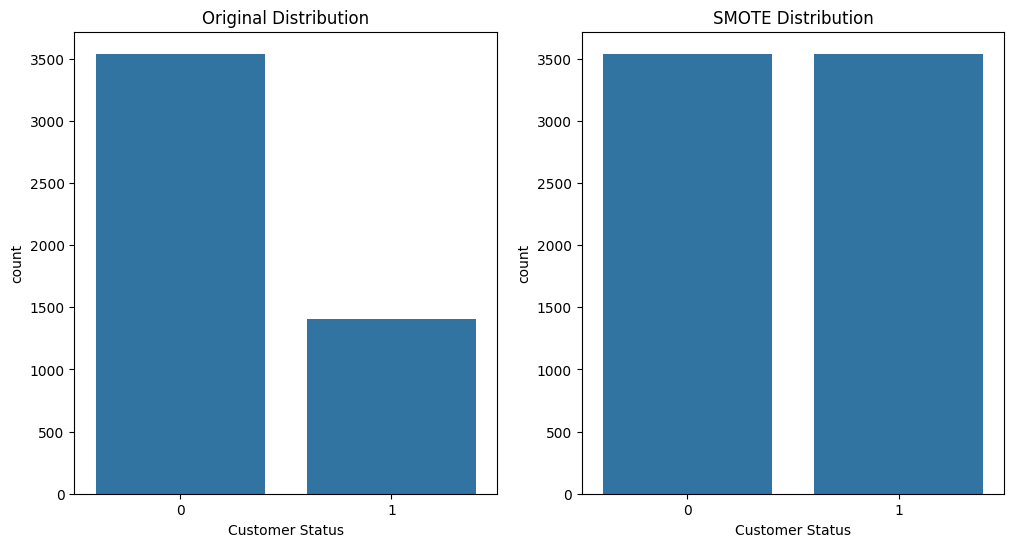

In [84]:
# Create a figure with two subplots
plt.figure(figsize=(12, 6))

# Plot the original class distribution
plt.subplot(1, 2, 1)
sns.countplot(x=y_train)
plt.title('Original Distribution')

# Plot the class distribution after apply SMOTE 
plt.subplot(1, 2, 2)
sns.countplot(x=y_train_smote)
plt.title('SMOTE Distribution')

plt.show()

## 4. Predictive Modelling

In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(random_state=6910),
    "SVC": SVC(random_state=6910),
    "KNeighbors": KNeighborsClassifier(),
    "GaussianNB": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(random_state=6910),
    "Random Forest": RandomForestClassifier(random_state=6910),
    "Gradient Boosting": GradientBoostingClassifier(random_state=6910),
    "AdaBoost": AdaBoostClassifier(random_state=6910),
    "Bagging": BaggingClassifier(random_state=6910),
    "MLP": MLPClassifier(random_state=6910),
    "XGboost": XGBClassifier(random_state=6910),
    "Lightgbm": LGBMClassifier(random_state=6910, verbose=-1)
    }

## 5. Models Evaluation

#### Classifiers Performance Evaluation

In [86]:
# Define the metrics
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

In [93]:
from sklearn.model_selection import StratifiedKFold, cross_validate

# Evaluate the models using stratified 5-fold cross-validation
cv_results = {}
for name, model in models.items():
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=6910)
    cv_scores = cross_validate(model, X_train_processed, y_train, cv=cv, scoring=scoring, n_jobs=-1)
    cv_results[name] = {metric: cv_scores[f'test_{metric}'].mean() for metric in scoring}

# Convert the cross-validation results to a DataFrame
cv_results_df = pd.DataFrame(cv_results).T
cv_results_df.columns = [f'{col}' for col in cv_results_df.columns]
print("Cross-Validation Scores:")
print(round(cv_results_df, 2).sort_values(['roc_auc','f1', 'precision','recall'], ascending=False))

Cross-Validation Scores:
                     accuracy  precision  recall    f1  roc_auc
Gradient Boosting        0.87       0.82    0.70  0.75     0.93
XGboost                  0.87       0.80    0.71  0.75     0.93
Lightgbm                 0.87       0.80    0.71  0.75     0.93
AdaBoost                 0.86       0.78    0.72  0.75     0.92
Random Forest            0.87       0.83    0.66  0.74     0.92
Logistic Regression      0.85       0.74    0.71  0.73     0.91
Bagging                  0.85       0.80    0.64  0.71     0.90
MLP                      0.84       0.73    0.69  0.71     0.90
SVC                      0.84       0.75    0.66  0.70     0.89
GaussianNB               0.76       0.55    0.85  0.67     0.86
KNeighbors               0.79       0.64    0.65  0.64     0.83
Decision Tree            0.82       0.68    0.68  0.68     0.78


In [89]:
# Evaluate the models on the unseen test set
test_results = {}
for name, model in models.items():
    model.fit(X_train_processed, y_train)
    y_pred = model.predict(X_test_processed)
    y_pred_proba = model.predict_proba(X_test_processed)[:, 1] if hasattr(model, "predict_proba") else None
    test_results[name] = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred),
        'roc_auc': roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None
    }

# Convert the test set results to a DataFrame
test_results_df = pd.DataFrame(test_results).T
test_results_df.columns = [f'{col}' for col in test_results_df.columns]
print("Test Set Scores:")
print(round(test_results_df, 2).sort_values('roc_auc', ascending=False))

Test Set Scores:
                     accuracy  precision  recall    f1  roc_auc
Gradient Boosting        0.89       0.83    0.76  0.79     0.94
Lightgbm                 0.88       0.80    0.76  0.78     0.94
Random Forest            0.88       0.83    0.71  0.77     0.93
AdaBoost                 0.87       0.79    0.75  0.77     0.93
XGboost                  0.88       0.80    0.75  0.77     0.93
Logistic Regression      0.86       0.76    0.76  0.76     0.92
MLP                      0.84       0.69    0.80  0.74     0.91
Bagging                  0.86       0.81    0.68  0.74     0.90
GaussianNB               0.76       0.55    0.87  0.67     0.87
KNeighbors               0.79       0.63    0.65  0.64     0.82
Decision Tree            0.82       0.67    0.74  0.70     0.80
SVC                      0.86       0.78    0.71  0.74      NaN


In [90]:
### Apply SMOTE on training dataset

# Evaluate the models using stratified 5-fold cross-validation
cv_results = {}
for name, model in models.items():
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=6910)
    cv_scores = cross_validate(model, X_train_smote, y_train_smote, cv=cv, scoring=scoring, n_jobs=-1)
    cv_results[name] = {metric: cv_scores[f'test_{metric}'].mean() for metric in scoring}

# Convert the cross-validation results to a DataFrame
cv_results_sm_df = pd.DataFrame(cv_results).T
cv_results_sm_df.columns = [f'{col}' for col in cv_results_df.columns]
print("Cross-Validation Scores:")
print(round(cv_results_sm_df, 2).sort_values('f1', ascending=False))

Cross-Validation Scores:
                     accuracy  precision  recall    f1  roc_auc
Lightgbm                 0.91       0.91    0.91  0.91     0.97
Random Forest            0.90       0.90    0.91  0.90     0.97
XGboost                  0.90       0.90    0.90  0.90     0.97
Gradient Boosting        0.89       0.89    0.90  0.89     0.97
Bagging                  0.89       0.90    0.88  0.89     0.95
MLP                      0.88       0.86    0.91  0.89     0.95
AdaBoost                 0.88       0.87    0.89  0.88     0.96
SVC                      0.87       0.84    0.90  0.87     0.95
Logistic Regression      0.84       0.82    0.88  0.85     0.93
Decision Tree            0.85       0.85    0.86  0.85     0.85
KNeighbors               0.81       0.75    0.94  0.83     0.89
GaussianNB               0.80       0.78    0.85  0.81     0.88


In [91]:
# Evaluate the models on the unseen test set
test_results = {}
for name, model in models.items():
    model.fit(X_train_smote, y_train_smote)
    y_pred = model.predict(X_test_processed)
    y_pred_proba = model.predict_proba(X_test_processed)[:, 1] if hasattr(model, "predict_proba") else None
    test_results[name] = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred),
        'roc_auc': roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None
    }

# Convert the test set results to a DataFrame
test_results_sm_df = pd.DataFrame(test_results).T
test_results_sm_df.columns = [f'{col}' for col in test_results_df.columns]
print("Test Set Scores:")
print(round(test_results_sm_df, 2).sort_values(['roc_auc','f1'], ascending=False))

Test Set Scores:
                     accuracy  precision  recall    f1  roc_auc
Gradient Boosting        0.88       0.76    0.84  0.80     0.94
Lightgbm                 0.88       0.78    0.80  0.79     0.94
AdaBoost                 0.86       0.71    0.85  0.78     0.93
XGboost                  0.88       0.78    0.79  0.78     0.93
Random Forest            0.87       0.77    0.78  0.77     0.92
Bagging                  0.87       0.78    0.76  0.77     0.91
Logistic Regression      0.83       0.65    0.87  0.75     0.92
SVC                      0.84       0.68    0.82  0.74      NaN
MLP                      0.84       0.71    0.77  0.74     0.91
Decision Tree            0.82       0.66    0.74  0.70     0.79
GaussianNB               0.77       0.57    0.85  0.68     0.87
KNeighbors               0.71       0.50    0.82  0.62     0.81


#### Hyperparameters top 3 algorithms

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

lgbm = LGBMClassifier(verbose=-1)
gbm = GradientBoostingClassifier()
ada = AdaBoostClassifier()


# LightGBM parameters
lgbm_grid_params = {
    'boosting_type': ['gbdt', 'dart', 'goss', 'rf'],
    'num_leaves': [20, 30, 50, 70],
    'max_depth': [-1, 3, 5, 7, 9],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [50, 100, 200, 300],
    'subsample_for_bin': [200000, 220000, 240000, 260000],
    'objective': ['binary'],
    'class_weight': [None, 'balanced'],
    'min_split_gain': [0.0, 0.1, 0.2, 0.3],
    'min_child_weight': [0.001, 0.01, 0.1],
    'min_child_samples': [10, 20, 30, 40],
    'subsample': [0.1, 0.5, 1.0],
    'subsample_freq': [0, 1, 2, 3],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha': [0.0, 0.1, 0.5, 1.0],
    'reg_lambda': [0.0, 0.1, 0.5, 1.0],
    'importance_type': ['split', 'gain']
}

# Gradient Boosting parameters
gbm_grid_params = {
    'loss': ['log_loss', 'deviance', 'exponential'],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [50, 100, 200, 300],
    'subsample': [0.8, 0.9, 1.0],
    'criterion': ['friedman_mse', 'squared_error'],
    'min_samples_split': [2, 4, 6, 8],
    'min_samples_leaf': [1, 2, 4, 6],
    'min_weight_fraction_leaf': [0, 0.1, 0.2],
    'max_depth': [3, 5, 7, 9],
    'min_impurity_decrease': [0, 0.01, 0.02, 0.05]
}

# AdaBoost parameters
ada_grid_params = {
    'n_estimators': [50, 100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.5, 1.0],
    'algorithm': ['SAMME', 'SAMME.R']
}

In [ ]:
# LightGBM GridSearchCV
lgbm_grid = GridSearchCV(lgbm, lgbm_grid_params, scoring='roc_auc', cv=cv)
lgbm_grid.fit(X_train, y_train)

# Gradient Boosting GridSearchCV
gbm_grid = GridSearchCV(gbm, gbm_grid_params, scoring='roc_auc', cv=cv)
gbm_grid.fit(X_train, y_train)

# AdaBoost GridSearchCV
ada_grid = GridSearchCV(ada, ada_grid_params, scoring='roc_auc', cv=cv)
ada_grid.fit(X_train, y_train)

In [ ]:
### RandomizedSearchCV

from scipy.stats import randint, uniform

# LightGBM parameters for RandomizedSearchCV
lgbm_rand_params = {
    'boosting_type': ['gbdt', 'dart', 'goss', 'rf'],
    'num_leaves': randint(31, 90),
    'max_depth': randint(-1, 9),
    'learning_rate': uniform(0.01, 0.2),
    'n_estimators': randint(50, 300),
    'subsample_for_bin': randint(200000, 260000),
    'objective': ['binary'],
    'class_weight': [None, 'balanced'],
    'min_split_gain': uniform(0.0, 0.3),
    'min_child_weight': [0.001, 0.01, 0.1],
    'min_child_samples': randint(10, 40),
    'subsample': uniform(0.8, 1.0),
    'subsample_freq': randint(0, 3),
    'colsample_bytree': uniform(0.6, 1.0),
    'reg_alpha': uniform(0.0, 1.0),
    'reg_lambda': uniform(0.0, 1.0), 
    'importance_type': ['split', 'gain']
}

# Gradient Boosting parameters for RandomizedSearchCV
gbm_rand_params = {
    'loss': ['log_loss', 'deviance', 'exponential'],
    'learning_rate': uniform(0.01, 0.2),
    'n_estimators': randint(50, 300),
    'subsample': uniform(0.8, 1.0),
    'criterion': ['friedman_mse', 'squared_error'],
    'min_samples_split': randint(2, 8),
    'min_samples_leaf': randint(1, 6),
    'min_weight_fraction_leaf': uniform(0, 0.2),
    'max_depth': randint(3, 9),
    'min_impurity_decrease': uniform(0, 0.05)
}

# AdaBoost parameters for RandomizedSearchCV
ada_rand_params = {
    'n_estimators': randint(50, 300),
    'learning_rate': uniform(0.01, 1.0),
    'algorithm': ['SAMME', 'SAMME.R']
}

In [ ]:
### RandomizedSearchCV on original training data set

# LightGBM RandomizedSearchCV
lgbm_random = RandomizedSearchCV(lgbm, lgbm_rand_params, scoring='roc_auc', cv=cv, n_iter=50, random_state=6910)
lgbm_random.fit(X_train_pro_df, y_train)

# Gradient Boosting RandomizedSearchCV
gbm_random = RandomizedSearchCV(gbm, gbm_rand_params, scoring='roc_auc', cv=cv, n_iter=50, random_state=6910)
gbm_random.fit(X_train_pro_df, y_train)

# AdaBoost RandomizedSearchCV
ada_random = RandomizedSearchCV(ada, ada_rand_params, scoring='roc_auc', cv=cv, n_iter=50, random_state=6910)
ada_random.fit(X_train_pro_df, y_train)


In [ ]:
print("Best parameters for LightGBM:", lgbm_grid.best_params_)
print("Best parameters for Gradient Boosting:", gbm_grid.best_params_)
print("Best parameters for AdaBoost:", ada_grid.best_params_)

print("Best parameters for LightGBM (Randomized):", lgbm_random.best_params_)
print("Best parameters for Gradient Boosting (Randomized):", gbm_random.best_params_)
print("Best parameters for AdaBoost (Randomized):", ada_random.best_params_)

In [ ]:
print("Best 5-Fold CV Score for LightGBM:", lgbm_grid.best_score_)
print("Best 5-Fold CV Score for Gradient Boosting:", gbm_grid.best_score_)
print("Best 5-Fold CV Score for AdaBoost:", ada_grid.best_score_)

print("Best 5-Fold CV Score for LightGBM (Randomized):", lgbm_random.best_score_)
print("Best 5-Fold CV Score for Gradient Boosting (Randomized):", gbm_random.best_score_)
print("Best 5-Fold CV Score for AdaBoost (Randomized):", ada_random.best_score_)

In [ ]:
# Retrain the classifiers with the best parameters
best_lgbm_model = LGBMClassifier(**lgbm_random.best_params_, random_state=6910, verbose=-1)
best_gb_model = GradientBoostingClassifier(**gbm_random.best_params_, random_state=6910)
best_ada_model = AdaBoostClassifier(**ada_random.best_params_, random_state=6910)

# List of models
models = [
    ('LightGBM', best_lgbm_model),
    ('Gradient Boosting', best_gb_model),
    ('AdaBoost', best_ada_model)    
]

# Fit the models and make predictions
results = []
for name, model in models:
    model.fit(X_train_pro_df, y_train)
    y_pred = model.predict(X_test_pro_df)
    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred)
    })

# Create a DataFrame to display the results
results_df = pd.DataFrame(results)
print(round(results_df, 2).sort_values('F1 Score', ascending=False))

In [ ]:
### RandomizedSearchCV on SMOTE training data set

# LightGBM RandomizedSearchCV
lgbm_random_smote = RandomizedSearchCV(lgbm, lgbm_rand_params, scoring='f1', cv=cv, n_iter=50, random_state=6910)
lgbm_random_smote.fit(X_train_smote, y_train_smote)

# Gradient Boosting RandomizedSearchCV
gbm_random_smote = RandomizedSearchCV(gbm, gbm_rand_params, scoring='f1', cv=cv, n_iter=50, random_state=6910)
gbm_random_smote.fit(X_train_smote, y_train_smote)

# AdaBoost RandomizedSearchCV
ada_random_smote = RandomizedSearchCV(ada, ada_rand_params, scoring='f1', cv=cv, n_iter=50, random_state=6910)
ada_random_smote.fit(X_train_smote, y_train_smote)

In [ ]:
print("Best 5-Fold CV Score for LightGBM (Randomized):", lgbm_random_smote.best_score_)
print("Best 5-Fold CV Score for AdaBoost (Randomized):", ada_random_smote.best_score_)
print("Best 5-Fold CV Score for Gradient Boosting (Randomized):", gbm_random_smote.best_score_)

In [ ]:
# Retrain the classifiers with the best parameters trained on SMOTE training dataset
best_lgbm_model_smote = LGBMClassifier(**lgbm_random_smote.best_params_, random_state=6910, verbose=-1)
best_gb_model_smote = GradientBoostingClassifier(**gbm_random_smote.best_params_, random_state=6910)
best_ada_model_smote = AdaBoostClassifier(**ada_random_smote.best_params_, random_state=6910)


# List of models
models = [
    ('LightGBM', best_lgbm_model_smote),
    ('Gradient Boosting', best_gb_model_smote),
    ('AdaBoost', best_ada_model_smote)    
]

# Fit the models and make predictions
results = []
for name, model in models:
    model.fit(X_train_smote, y_train_smote)
    y_pred = model.predict(X_test_pro_df)
    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred)
    })

# Create a DataFrame to display the results
results_df = pd.DataFrame(results)
print(round(results_df, 2).sort_values('F1 Score', ascending=False))

#### Extract Feature Importance

In [ ]:
### Feature Importance

# LightGBM Feature Importance
feature_importance_lgbm = best_lgbm_model.feature_importances_
sorted_idx_lgbm = feature_importance_lgbm.argsort()[-10:]

plt.figure(figsize=(8, 10))
plt.barh(range(len(sorted_idx_lgbm)), feature_importance_lgbm[sorted_idx_lgbm], align='center')
plt.yticks(range(len(sorted_idx_lgbm)), [X_test_pro_df.columns[i] for i in sorted_idx_lgbm])
plt.xlabel('Importance')
#plt.title('Top 10 Feature Importance in LightGBM')
plt.show()


# Gradient Boosting Feature Importance
feature_importance_gb = best_gb_model.feature_importances_
sorted_idx_gb = feature_importance_gb.argsort()[-10:]

plt.figure(figsize=(8, 10))
plt.barh(range(len(sorted_idx_gb)), feature_importance_gb[sorted_idx_gb], align='center')
plt.yticks(range(len(sorted_idx_gb)), [X_test_pro_df.columns[i] for i in sorted_idx_gb])
plt.xlabel('Importance')
#plt.title('Top 10 Feature Importance in Gradient Boosting')
plt.show()

# AdaBoost Feature Importance
if hasattr(best_ada_model, 'feature_importances_'):
    feature_importance_ada = best_ada_model.feature_importances_
    sorted_idx_ada = feature_importance_ada.argsort()[-10:]

    plt.figure(figsize=(8, 10))
    plt.barh(range(len(sorted_idx_ada)), feature_importance_ada[sorted_idx_ada], align='center')
    plt.yticks(range(len(sorted_idx_ada)), [X_test_pro_df.columns[i] for i in sorted_idx_ada])
    plt.xlabel('Importance')
    #plt.title('Top 10 Feature Importance in AdaBoost')
    plt.show()


In [ ]:
import shap
plt.figure(figsize=(8, 10))
# Explain the model's predictions using SHAP for LightGBM
explainer = shap.TreeExplainer(best_lgbm_model)
shap_values = explainer.shap_values(X_test_pro_df)

# Plot the SHAP values for the first 10 predictions
shap.summary_plot(shap_values, X_test_pro_df, plot_type="bar", max_display=10)



## 6. Model Deployment

#### We need to subscribe the Microsoft Azure in order to implement this deployment step.

In [ ]:
# Import libraries

import os
import json
import requests

from azureml.core import Workspace
from azureml.core.model import Model
from azureml.core.environment import Environment
from azureml.core.conda_dependencies import CondaDependencies
from azureml.core.model import InferenceConfig
from azureml.core.webservice import AciWebservice, Webservice

In [ ]:
# 1. Model Serialization - save the final model and processing pipeline to pickle file
import pickle

filename = 'churn_prediction_lgbm.pkl'
pickle.dump(best_lgbm_model, open(filename, 'wb'))

pipeline_filename = 'processing_pipeline.pkl'
pickle.dump(processing_pipeline, open(pipeline_filename, 'wb'))

In [ ]:
# 2. Scoring scrip in "score.py" file

In [ ]:
# 3. Create Azure resources

# Load the configuration file
config_path = "config.json"

# Read JSON data into a dictionary
import json
with open(config_path, 'r') as file:
    data = json.load(file)

# Get Azure config info
subscription_id = data["subscription_id"]
resource_group = data["resource_group"]  
workspace_name = data["workspace_name"]
region = data["region"]

# # Create a workspace
# ws = Workspace.create(name=workspace_name,
#                       subscription_id=subscription_id,
#                       resource_group=resource_group,
#                       location=region)

# Get the available workspace
ws = Workspace.from_config()

In [ ]:
# 4. Deploy the model

# Register the model in Azure Machine Learning
model_path = 'churn_prediction_lgbm.pkl'
model_name='churn_prediction_model'
registered_model = Model.register(model_path=model_path, model_name=model_name, workspace=ws)

# Create a Conda environment for model
conda_env = Environment('my-conda-env')
conda_env.python.conda_dependencies = CondaDependencies.create(
    conda_packages=['scikit-learn', 'lightgbm', 'xgboost', 'catboost', 'pandas', 'seaborn', 'imblearn', 'shap'],
    pip_packages=['azureml-sdk']
)

# Create an InferenceConfig
inference_config = InferenceConfig(entry_script='score.py', environment=conda_env)

# Specify deployment configuration for ACI
aci_config = AciWebservice.deploy_configuration(cpu_cores=1, memory_gb=1)

# Deploy model
service = Model.deploy(workspace=ws,
                       name='churn-prediction-service',
                       models=[registered_model],
                       inference_config=inference_config,
                       deployment_config=aci_config)
service.wait_for_deployment(show_output=True)

In [ ]:
# Get the inference URI
scoring_uri = service.scoring_uri